In [155]:
from __future__ import division
import numpy as np
import scipy as sp
import math
import pandas as pd
import ipympl
import matplotlib.pyplot as plt
from clustering import *
from generate_data import *
from pred_analysis import *
import scipy.stats as st

In [6]:
df = pd.read_csv('clustering-analysis.csv')

In [7]:
df.head()

,pf,n,k,p,L,G,r,mindivY,maxdivY,avgdivY,...,ami_xw,p_xy,s_xy,p_wx,s_wx,p_wy,s_wy,minsupp,avgsupp,maxsupp
0,5,50,1,1,25,1000,0.2,2.941713,11.993524,5.866986,...,0.442253,0.967010,0.955787,0.835057,0.853167,0.779893,0.768765,0.5,0.823810,1.0
1,5,50,1,2,25,1000,0.2,1.000000,6.613805,4.983532,...,0.308447,0.931450,0.934342,0.815354,0.815445,0.700311,0.700699,0.5,0.650000,1.0
2,5,50,1,5,25,1000,0.2,1.000000,7.071068,3.051655,...,0.252585,0.954411,0.958669,0.836808,0.843816,0.835409,0.839808,0.6,0.733333,1.0
3,5,50,1,10,25,1000,0.2,1.000000,4.867992,2.169949,...,0.481333,0.964393,0.964664,0.887294,0.886445,0.818620,0.803068,0.4,0.560000,0.7
4,5,50,2,1,25,1000,0.2,2.828427,16.088332,9.741636,...,0.166934,0.951162,0.932456,0.574300,0.567695,0.506116,0.457096,0.2,0.638413,1.0


In [59]:
sparse_df =  df[(df.k == df.n//200)] # Vary n

In [60]:
sparse_df

,pf,n,k,p,L,G,r,mindivY,maxdivY,avgdivY,...,ami_xw,p_xy,s_xy,p_wx,s_wx,p_wy,s_wy,minsupp,avgsupp,maxsupp
72,5,200,1,5,100,1000,0.2,5.971890,18.793075,10.901308,...,0.115290,0.945407,0.946723,0.842632,0.863484,0.753766,0.763667,0.500000,0.648387,1.000000
73,5,200,1,10,100,1000,0.2,4.847674,10.245279,7.268287,...,0.267155,0.950652,0.950204,0.846394,0.857677,0.777263,0.765907,0.500000,0.602632,0.800000
74,5,200,1,20,100,1000,0.2,1.000000,8.575240,3.875170,...,0.175301,0.912752,0.918364,0.839704,0.840249,0.771868,0.772090,0.500000,0.595000,0.850000
75,5,200,1,40,100,1000,0.2,1.000000,4.932057,1.986313,...,0.556439,0.907478,0.911237,0.893799,0.907172,0.756656,0.767214,0.550000,0.585000,0.675000
88,5,200,1,5,100,1000,0.5,2.500435,15.367951,11.447599,...,0.368092,0.951053,0.950851,0.854551,0.862092,0.806528,0.798317,0.500000,0.680808,0.800000
89,5,200,1,10,100,1000,0.5,2.733183,11.145947,6.651435,...,0.367380,0.959043,0.962068,0.861854,0.875192,0.801315,0.805978,0.500000,0.644444,0.800000
90,5,200,1,20,100,1000,0.5,1.000000,5.858024,3.449580,...,0.374973,0.874890,0.885095,0.865767,0.869323,0.845737,0.862033,0.500000,0.583333,0.750000
91,5,200,1,40,100,1000,0.5,1.000000,3.986152,1.990926,...,0.486371,0.969719,0.971401,0.883594,0.894780,0.860299,0.865859,0.500000,0.545000,0.575000
104,5,200,1,5,100,1000,0.8,5.347858,22.129615,12.364823,...,0.249112,0.927089,0.923304,0.879436,0.879988,0.823098,0.825321,0.500000,0.668571,1.000000
105,5,200,1,10,100,1000,0.8,2.906907,12.333368,7.098540,...,0.220881,0.792753,0.820984,0.860764,0.877500,0.797979,0.831477,0.500000,0.618421,1.000000


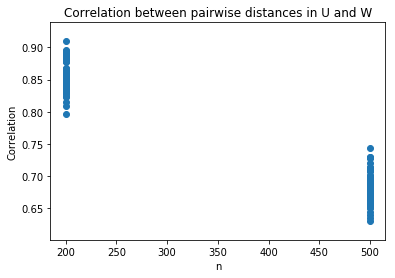

In [61]:
plt.scatter(sparse_df.n, sparse_df.p_wx)
plt.title('Correlation between pairwise distances in U and W')
plt.xlabel('n')
plt.ylabel('Correlation')
plt.show()

In [69]:
df.loc[df['p_wx'].idxmax()]

pf           50.000000
n            50.000000
k             1.000000
p            10.000000
L            25.000000
G          1000.000000
r             0.800000
mindivY       1.000000
maxdivY       1.754765
avgdivY       1.285565
mindivX       1.000000
maxdivX       1.754765
avgdivX       1.285565
ami_yw        0.769625
ami_yx        0.932541
ami_xw        0.559984
p_xy          0.999236
s_xy          0.999175
p_wx          0.922634
s_wx          0.936869
p_wy          0.917323
s_wy          0.932623
minsupp       0.400000
avgsupp       0.466667
maxsupp       0.500000
Name: 531, dtype: float64

In [95]:
df.loc[df['ami_yx'].idxmax()]

pf             10.000000
n              50.000000
k               1.000000
p              10.000000
L              25.000000
G            1000.000000
r               0.800000
mindivY         1.000000
maxdivY         3.602474
avgdivY         1.520495
mindivX         1.000000
maxdivX         3.602474
avgdivX         1.520495
ami_yw          0.605715
ami_yx          1.000000
ami_xw          0.761113
p_xy            0.969957
s_xy            0.976237
p_wx            0.904899
s_wx            0.916333
p_wy            0.885764
s_wy            0.891736
minsupp         0.500000
avgsupp         0.562500
maxsupp         0.600000
mindivY_k       1.000000
avgdivY_k       1.520495
maxdivY_k       3.602474
mindivX_k       1.000000
avgdivX_k       1.520495
maxdivX_k       3.602474
Name: 195, dtype: float64

In [71]:
df.loc[df['avgsupp'].idxmax()]

pf           50.000000
n            50.000000
k             1.000000
p             1.000000
L            25.000000
G          1000.000000
r             0.500000
mindivY       3.779763
maxdivY       9.136310
avgdivY       5.363339
mindivX       1.000000
maxdivX      10.949701
avgdivX       5.536308
ami_yw        0.204739
ami_yx        0.414332
ami_xw        0.392632
p_xy          0.994063
s_xy          0.992823
p_wx          0.804502
s_wx          0.805664
p_wy          0.781213
s_wy          0.782092
minsupp       0.500000
avgsupp       0.869565
maxsupp       1.000000
Name: 516, dtype: float64

In [72]:
mindivY_k = df['mindivY']/df['k']

In [75]:
df['mindivY_k'] = mindivY_k

In [77]:
avgdivY_k = df['avgdivY']/df['k']
df['avgdivY_k'] = avgdivY_k

maxdivY_k = df['maxdivY']/df['k']
df['maxdivY_k'] = maxdivY_k

mindivX_k = df['mindivX']/df['k']
df['mindivX_k'] = mindivX_k

avgdivX_k = df['avgdivX']/df['k']
df['avgdivX_k'] = avgdivX_k

maxdivX_k = df['maxdivX']/df['k']
df['maxdivX_k'] = maxdivX_k

In [93]:
result = df.sort(['ami_yx'], ascending = False)

/Users/antheacheung/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  """Entry point for launching an IPython kernel.


In [98]:
result[['n', 'k','ami_yx']]

,n,k,ami_yx
723,100,2,1.000000
745,200,1,1.000000
522,50,2,1.000000
243,200,1,1.000000
411,200,1,1.000000
519,50,1,1.000000
195,50,1,1.000000
363,50,1,1.000000
687,50,1,1.000000
535,50,2,0.936702


In [99]:
result = df.sort(['p_wx'], ascending = False)
result[['n', 'k','p_wx', 'ami_yx']]

/Users/antheacheung/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  """Entry point for launching an IPython kernel.


,n,k,p_wx,ami_yx
531,50,1,0.922634,0.932541
171,50,1,0.921412,0.530518
183,50,1,0.920054,0.934965
675,50,1,0.913583,0.508291
243,200,1,0.909681,1.000000
339,50,1,0.907472,0.667168
338,50,1,0.907108,0.544385
195,50,1,0.904899,1.000000
12,50,1,0.900439,0.355556
351,50,1,0.898794,0.446181


In [100]:
df1 = df[df.k!=1]

In [101]:
df1

,pf,n,k,p,L,G,r,mindivY,maxdivY,avgdivY,...,s_wy,minsupp,avgsupp,maxsupp,mindivY_k,avgdivY_k,maxdivY_k,mindivX_k,avgdivX_k,maxdivX_k
4,5,50,2,1,25,1000,0.2,2.828427,16.088332,9.741636,...,0.457096,0.200000,0.638413,1.000000,1.414214,4.870818,8.044166,1.414214,4.491943,9.668350
5,5,50,2,2,25,1000,0.2,4.000000,14.434105,9.926786,...,0.727798,0.333333,0.546591,1.000000,2.000000,4.963393,7.217053,1.000000,4.293763,8.530539
6,5,50,2,5,25,1000,0.2,2.749459,11.555674,7.596687,...,0.660187,0.400000,0.573333,0.800000,1.374730,3.798343,5.777837,1.000000,3.312294,6.609646
7,5,50,2,10,25,1000,0.2,2.000000,5.489082,4.231903,...,0.717140,0.400000,0.471429,0.600000,1.000000,2.115951,2.744541,1.000000,1.783936,3.350470
8,5,50,5,1,25,1000,0.2,14.555225,21.237744,17.961239,...,0.449764,0.285714,0.410205,0.600000,2.911045,3.592248,4.247549,1.825093,3.201725,4.412959
9,5,50,5,2,25,1000,0.2,13.770081,21.244278,18.246250,...,0.484061,0.250000,0.398619,0.625000,2.754016,3.649250,4.248856,1.663978,2.925817,4.600137
10,5,50,5,5,25,1000,0.2,12.324568,16.755267,15.444678,...,0.362000,0.266667,0.422540,0.800000,2.464914,3.088936,3.351053,1.928323,2.761410,3.623863
11,5,50,5,10,25,1000,0.2,8.773827,15.622983,13.051840,...,0.400106,0.300000,0.389216,0.500000,1.754765,2.610368,3.124597,1.000000,2.029659,3.099010
16,5,50,2,1,25,1000,0.5,6.597540,16.396017,11.737991,...,0.615711,0.250000,0.585333,1.000000,3.298770,5.868995,8.198009,1.414214,5.076510,10.163680
17,5,50,2,2,25,1000,0.5,4.000000,16.088332,9.280655,...,0.491422,0.333333,0.644928,1.000000,2.000000,4.640327,8.044166,1.000000,4.197642,9.115614


In [102]:
result = df1.sort(['ami_yx'], ascending = False)
result[['n', 'k','p_wx', 'ami_yx']]


/Users/antheacheung/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  """Entry point for launching an IPython kernel.


,n,k,p_wx,ami_yx
723,100,2,0.759962,1.000000
522,50,2,0.707809,1.000000
535,50,2,0.715051,0.936702
555,100,2,0.745541,0.897584
700,50,2,0.712330,0.876902
733,100,2,0.754180,0.876782
794,500,2,0.693385,0.856713
691,50,2,0.671182,0.856000
627,500,2,0.713666,0.831754
679,50,2,0.700190,0.830746


In [107]:
result = df1.sort(['p_xy'], ascending = False)
result[['n', 'k','p_wy', 'p_xy', 'ami_yx']]

/Users/antheacheung/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  """Entry point for launching an IPython kernel.


,n,k,p_wy,p_xy,ami_yx
703,50,2,0.753414,0.998300,0.808239
723,100,2,0.748657,0.998118,1.000000
705,50,5,0.552230,0.998054,0.697715
733,100,2,0.756923,0.997956,0.876782
711,100,2,0.740929,0.997832,0.693129
707,50,5,0.604640,0.997820,0.408562
511,50,2,0.807060,0.997613,0.553082
716,100,10,0.422558,0.997497,0.410824
692,50,5,0.543542,0.997429,0.684382
677,50,2,0.771719,0.997399,0.589891


In [110]:
result = df1.sort(['p_wy'], ascending = False)
result[['n', 'k','pf','p','p_wy', 'p_xy', 'ami_yx']]

/Users/antheacheung/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  """Entry point for launching an IPython kernel.


,n,k,pf,p,p_wy,p_xy,ami_yx
511,50,2,50,10,0.807060,0.997613,0.553082
28,50,2,5,1,0.799923,0.889667,0.243066
366,50,2,20,5,0.793650,0.976159,0.571166
532,50,2,50,1,0.780764,0.995355,0.547920
19,50,2,5,10,0.780388,0.790607,0.334299
543,100,2,50,20,0.775924,0.989049,0.614559
677,50,2,100,2,0.771719,0.997399,0.589891
552,100,2,50,2,0.771599,0.989932,0.421285
565,100,2,50,5,0.768130,0.990948,0.579521
735,100,2,100,20,0.766951,0.995279,0.689249


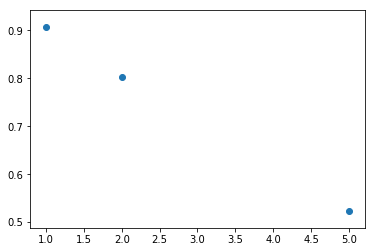

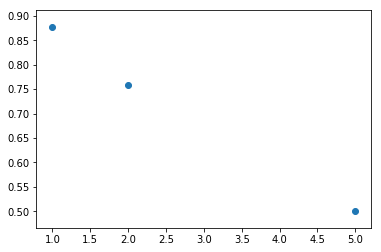

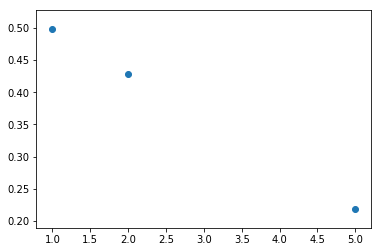

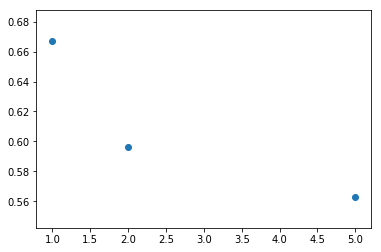

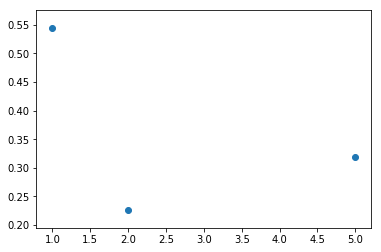

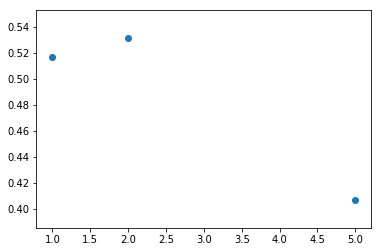

In [152]:
fig1 = df[(df.n==50)& (df.r==0.2) & (df.pf ==20) & (df.p ==10)]
fig1
plt.scatter(fig1.k, fig1.p_wx)
plt.show()

plt.scatter(fig1.k, fig1.p_wy)
plt.show()

plt.scatter(fig1.k, fig1.ami_yw)
plt.show()

plt.scatter(fig1.k, fig1.ami_yx)
plt.show()

plt.scatter(fig1.k, fig1.ami_xw)
plt.show()

plt.scatter(fig1.k, fig1.avgsupp)
plt.show()

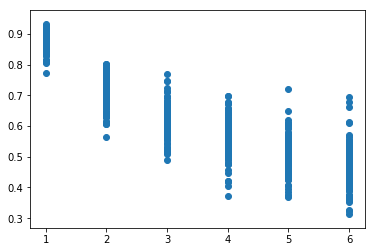

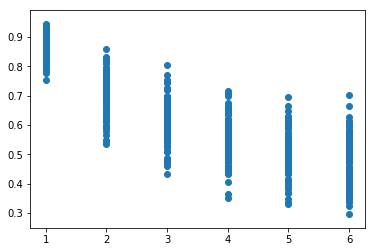

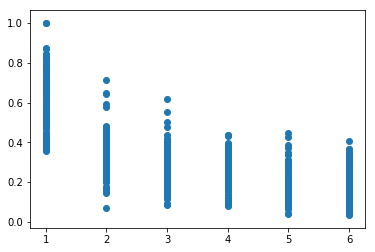

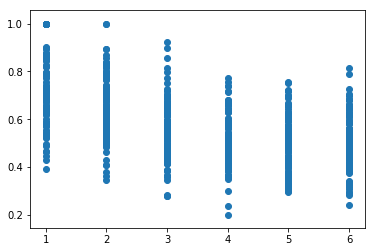

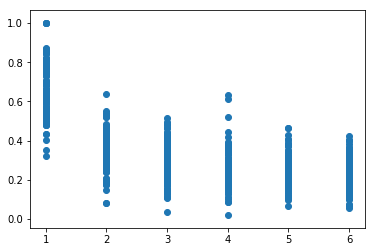

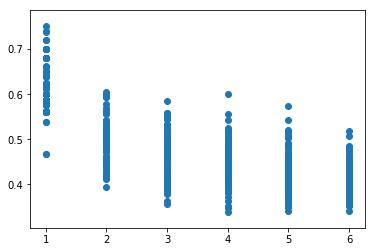

In [153]:
fig1 = pd.read_csv('analysis1.csv')

plt.scatter(fig1.k, fig1.p_wx)
plt.show()

plt.scatter(fig1.k, fig1.p_wy)
plt.show()

plt.scatter(fig1.k, fig1.ami_yw)
plt.show()

plt.scatter(fig1.k, fig1.ami_yx)
plt.show()

plt.scatter(fig1.k, fig1.ami_xw)
plt.show()

plt.scatter(fig1.k, fig1.avgsupp)
plt.show()

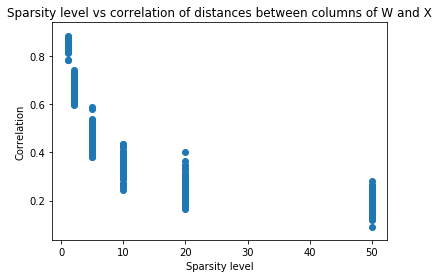

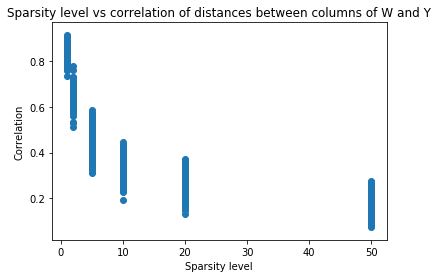

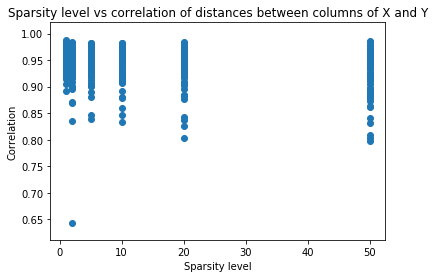

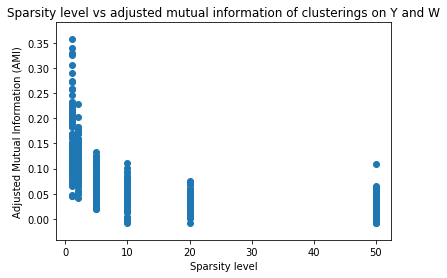

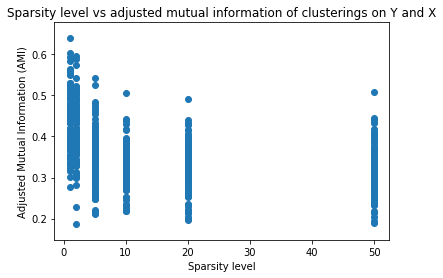

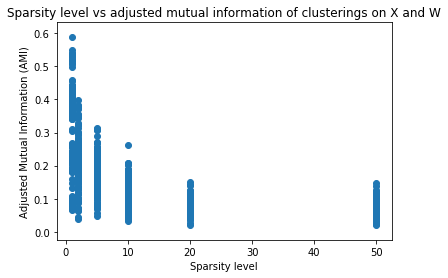

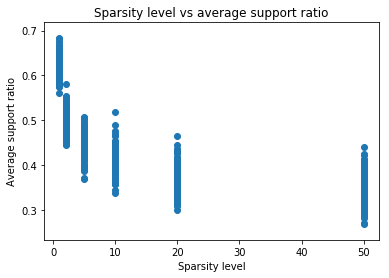

In [161]:
df2 = pd.read_csv('analysis2.csv')

plt.scatter(df2.k, df2.p_wx)
plt.title('Sparsity level vs correlation of distances between columns of W and X')
plt.xlabel('Sparsity level')
plt.ylabel('Correlation')
plt.show()


plt.scatter(df2.k, df2.p_wy)
plt.title('Sparsity level vs correlation of distances between columns of W and Y')
plt.xlabel('Sparsity level')
plt.ylabel('Correlation')
plt.show()

plt.scatter(df2.k, df2.p_xy)
plt.title('Sparsity level vs correlation of distances between columns of X and Y')
plt.xlabel('Sparsity level')
plt.ylabel('Correlation')
plt.show()



plt.scatter(df2.k, df2.ami_yw)
plt.title('Sparsity level vs adjusted mutual information of clusterings on Y and W')
plt.xlabel('Sparsity level')
plt.ylabel('Adjusted Mutual Information (AMI)')
plt.show()

plt.scatter(df2.k, df2.ami_yx)
plt.title('Sparsity level vs adjusted mutual information of clusterings on Y and X')
plt.xlabel('Sparsity level')
plt.ylabel('Adjusted Mutual Information (AMI)')
plt.show()

plt.scatter(df2.k, df2.ami_xw)
plt.title('Sparsity level vs adjusted mutual information of clusterings on X and W')
plt.xlabel('Sparsity level')
plt.ylabel('Adjusted Mutual Information (AMI)')
plt.show()

plt.scatter(df2.k, df2.avgsupp)
plt.title('Sparsity level vs average support ratio')
plt.xlabel('Sparsity level')
plt.ylabel('Average support ratio')
plt.show()

In [160]:
for k in [1,2, 5, 10, 20, 50]:
    group =df2[df2.k==k]
    pwx_m = df2[df2.k==k]['p_wx'].mean()
    pwx_s = df2

0.8505862728391844

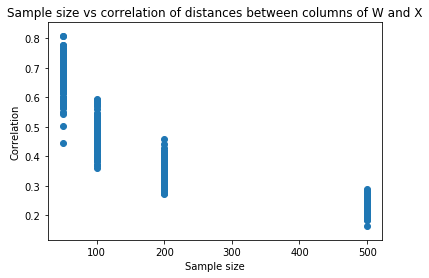

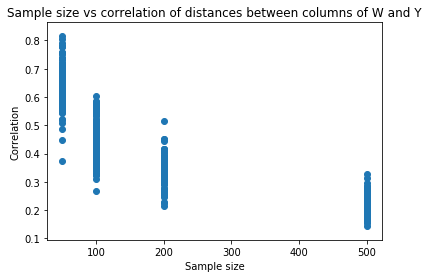

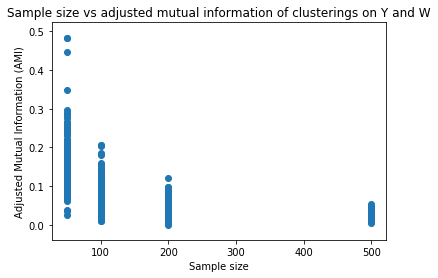

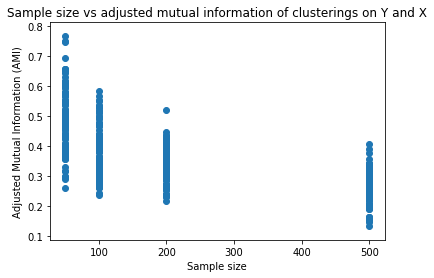

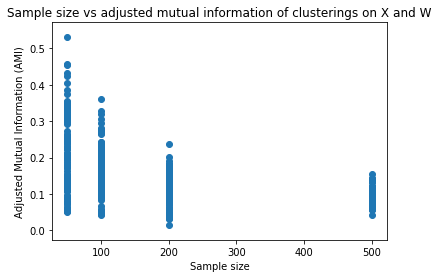

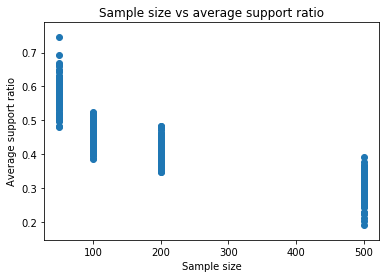

In [158]:
df3 = pd.read_csv('test_samplesize.csv')

plt.scatter(df3.n, df3.p_wx)
plt.title('Sample size vs correlation of distances between columns of W and X')
plt.xlabel('Sample size')
plt.ylabel('Correlation')
plt.show()

plt.scatter(df3.n, df3.p_wy)
plt.title('Sample size vs correlation of distances between columns of W and Y')
plt.xlabel('Sample size')
plt.ylabel('Correlation')
plt.show()


plt.scatter(df3.n, df3.ami_yw)
plt.title('Sample size vs adjusted mutual information of clusterings on Y and W')
plt.xlabel('Sample size')
plt.ylabel('Adjusted Mutual Information (AMI)')
plt.show()

plt.scatter(df3.n, df3.ami_yx)
plt.title('Sample size vs adjusted mutual information of clusterings on Y and X')
plt.xlabel('Sample size')
plt.ylabel('Adjusted Mutual Information (AMI)')
plt.show()

plt.scatter(df3.n, df3.ami_xw)
plt.title('Sample size vs adjusted mutual information of clusterings on X and W')
plt.xlabel('Sample size')
plt.ylabel('Adjusted Mutual Information (AMI)')
plt.show()

plt.scatter(df3.n, df3.avgsupp)
plt.title('Sample size vs average support ratio')
plt.xlabel('Sample size')
plt.ylabel('Average support ratio')
plt.show()